# DATASCIENCE PROJECT @ THE SPARKS FOUNDATION
# GRIP TASK - 2 (Unsupervised ML Using K-Means Clustering)

## Name :- Punit Bansal

##### Objective - To predict optimum no of clusters and represent them visually


#### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"C:\Users\punit\Desktop\project\Iris.csv")
print("Data Set Immported succcessfully")

Data Set Immported succcessfully


In [3]:
# Printing Data set
data.head(11)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Data Scaling


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x= data.iloc[:, 1:5]

scaler.fit(x)
print("Data scaled successfully")
x1 =scaler.transform(x)
x = pd.DataFrame(x1, columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])

Data scaled successfully


### Determining the optimum number of clusters using Elbow method.

In [7]:

k_rng = range(1,11) 
sse =[]   #Sum of squared errors
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(x)
    sse.append(km.inertia_)   #Intertia is sum of squared errors. Smaller intertia implies clusters are densed.

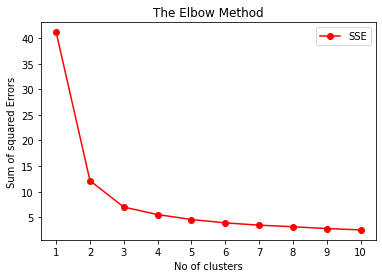

In [8]:
plt.title('The Elbow Method')

plt.plot(list(k_rng),sse, color='r', label='SSE', marker='o')
plt.xlabel('No of clusters')
plt.ylabel('Sum of squared Errors')
plt.xticks(list(k_rng))
plt.legend()
    
plt.show()

Sum of squared errors does not decrease much for the values of K greater than 3 therefore the optimum no of clusters is 3.

### Optimum no of clusters= 3


### Clustering

In [9]:
km = KMeans(n_clusters =3 )
x_pred= km.fit_predict(x.iloc[:, 0:4])
x['clusters']= x_pred

# now creating a separate data frames  with clusters
xa = x[x.clusters==0]
xb = x[x.clusters==1]
xc = x[x.clusters==2]
centroid1= km.cluster_centers_

### Visualizing Clusters


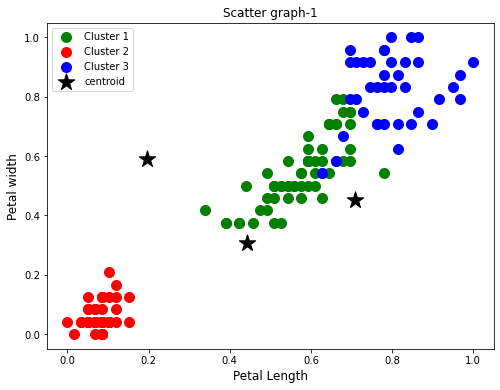

In [10]:
# Creating scatter plot of clusters


plt.figure(figsize=(8,6))
plt.title('Scatter graph-1')
plt.scatter(xa['PetalLengthCm'], xa['PetalWidthCm'], s=100,  c='g', label='Cluster 1')
plt.scatter(xb['PetalLengthCm'], xb['PetalWidthCm'], s=100, c='r', label='Cluster 2')
plt.scatter(xc['PetalLengthCm'], xc['PetalWidthCm'], s=100, c='b', label='Cluster 3')
plt.scatter(centroid1[:, 0], centroid1[:, 1], s=300, c='black', marker='*',label='centroid')


plt.xlabel("Petal Length", size='large')
plt.ylabel("Petal width", size='large')
plt.legend()
plt.show() 

In [ ]:
# similarly we can create scatter plot of Sepal width

In [11]:
km1 = KMeans(n_clusters =3 )
y_pred= km1.fit_predict(x.iloc[:, 0:2])
x['clusters_2']= y_pred
# now creating a separate data frames  with clusters
ya = x[x.clusters_2==0]
yb = x[x.clusters_2==1]
yc = x[x.clusters_2==2]
centroid2= km1.cluster_centers_
centroid2

array([[0.70478036, 0.46705426],
       [0.41810345, 0.28232759],
       [0.19897959, 0.60034014]])

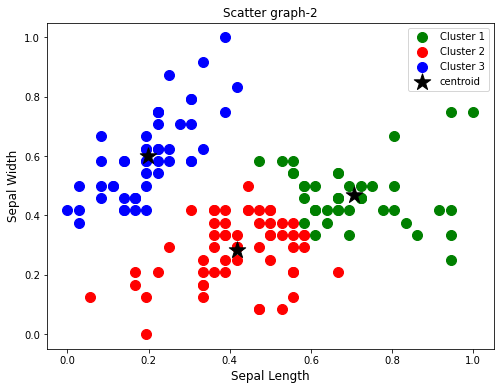

In [12]:
# Creating scatter plot of clusters


plt.figure(figsize=(8,6))
plt.title('Scatter graph-2')
plt.scatter(ya['SepalLengthCm'], ya['SepalWidthCm'], s=100, c='g', label='Cluster 1')
plt.scatter(yb['SepalLengthCm'], yb['SepalWidthCm'], s=100, c='r', label='Cluster 2')
plt.scatter(yc['SepalLengthCm'], yc['SepalWidthCm'], s=100, c='b', label='Cluster 3')
plt.scatter(centroid2[:, 0], centroid2[:, 1], s=300, c='black', marker='*',label='centroid')


plt.xlabel("Sepal Length", size='large')
plt.ylabel("Sepal Width", size='large')
plt.legend()
plt.show() 

###  3D- Visualization

<IPython.core.display.Javascript object>


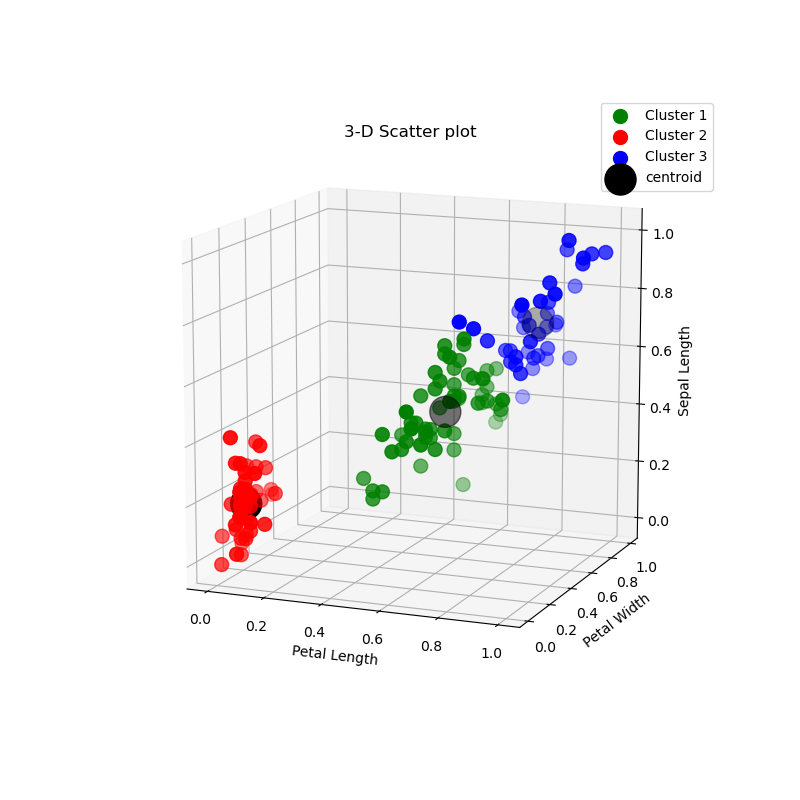

In [15]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (8,8))


ax = fig.add_subplot(projection='3d')
ax.scatter(xa['PetalLengthCm'], xa['PetalWidthCm'], xa['SepalLengthCm'], s=100,  c='g', label='Cluster 1')
ax.scatter(xb['PetalLengthCm'], xb['PetalWidthCm'], xb['SepalLengthCm'], s=100, c='r', label='Cluster 2')
ax.scatter(xc['PetalLengthCm'], xc['PetalWidthCm'], xc['SepalLengthCm'], s=100, c='b', label='Cluster 3')
ax.scatter(centroid1[:, 2], centroid1[:, 3], centroid1[:, 0], s=500, c='black', marker='o',label='centroid')
ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal Width')
ax.set_zlabel('Sepal Length')
ax.set_title('3-D Scatter plot')

ax.legend()



plt.show()
